## Tarea 5 Proyecto Análisis de Datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Titanic-Dataset.csv') 

In [6]:
print(data.head())
print(data.info())  
print(data.describe())  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

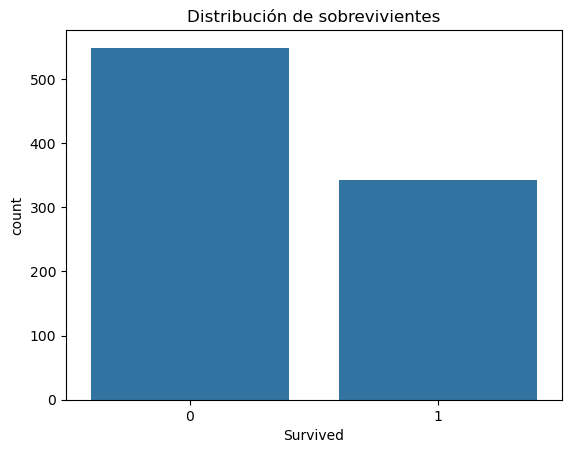

In [8]:
sns.countplot(data=data, x='Survived')
plt.title('Distribución de sobrevivientes')
plt.show()

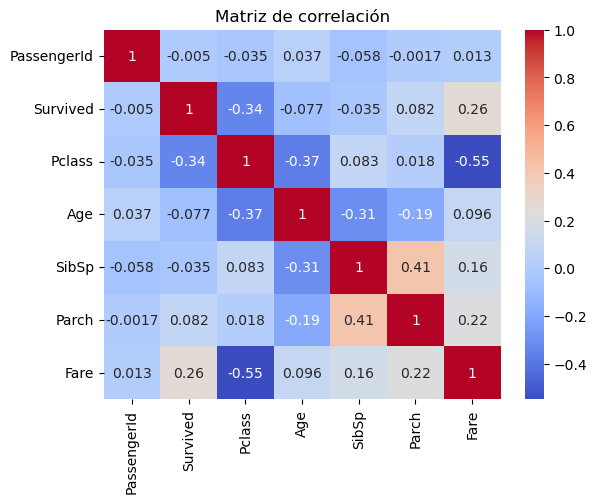

In [12]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

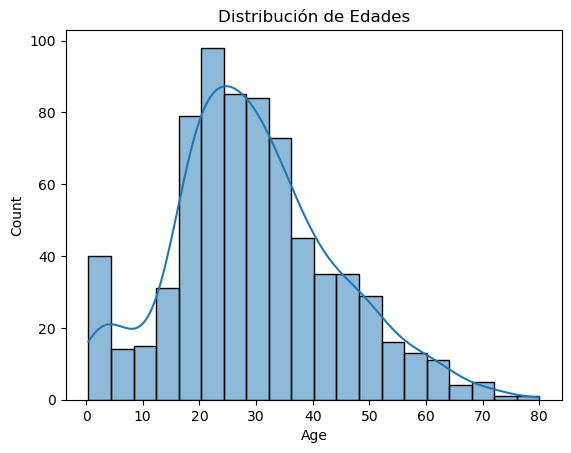

In [14]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.show()

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [22]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [24]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [26]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [28]:
corr_matrix = data.corr()
print(corr_matrix['Survived'].sort_values(ascending=False))

Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


In [30]:
features = ['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')


MSE: 0.13681714562190872
R2: 0.4358097602481883


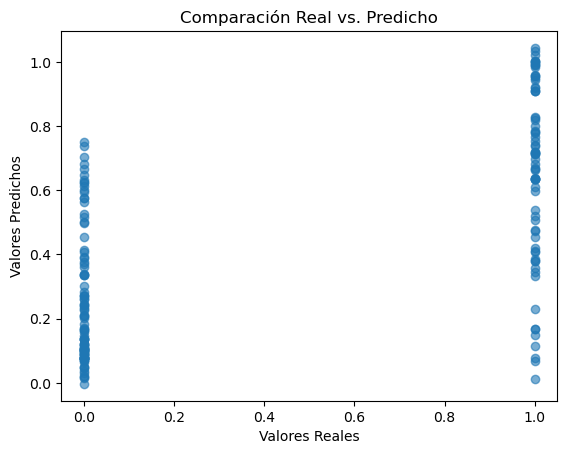

In [38]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación Real vs. Predicho')
plt.show()

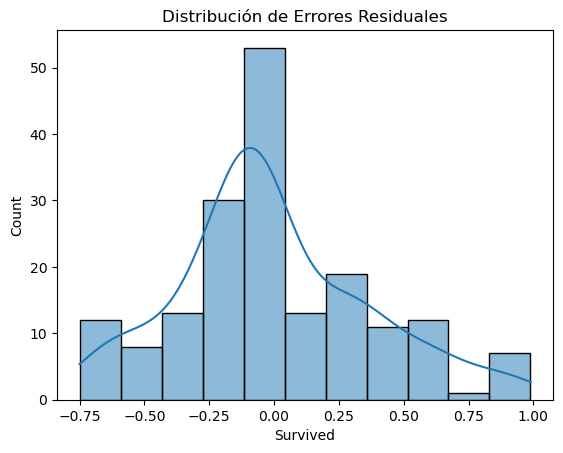

In [41]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribución de Errores Residuales')
plt.show()

In [43]:
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coef_df)

      Feature  Coefficient
0      Pclass    -0.166423
1         Age    -0.003792
2        Fare     0.000028
3    Sex_male    -0.499871
4  Embarked_Q    -0.029133
5  Embarked_S    -0.090162
